In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Define the ticker symbol for Reliance
ticker_symbol = "RELIANCE.NS"

# Download the historical data
data = yf.download(ticker_symbol, start="2021-04-01", end="2024-03-31")

# Display the first few rows of the data
print(data.head())

# Save the data to a CSV file
data.to_csv("Reliance_data.csv")

# Select the Target Variable Adj Close
df = data[['Adj Close']]

# Check for missing values
print("Missing values:")
print(df.isnull().sum())



[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-04-01  1862.613403  1873.689331  1848.906738  1866.166870  1847.110718   
2021-04-05  1869.028198  1869.074341  1811.017700  1839.169189  1820.388794   
2021-04-06  1849.691406  1850.568237  1817.386353  1831.508301  1812.806152   
2021-04-07  1845.999390  1889.288086  1839.815308  1848.629883  1829.752930   
2021-04-08  1856.152344  1866.305298  1839.538330  1850.937378  1832.036865   

              Volume  
Date                  
2021-04-01   5861656  
2021-04-05   7437549  
2021-04-06   7004597  
2021-04-07  12133176  
2021-04-08   7684594  
Missing values:
Adj Close    0
dtype: int64


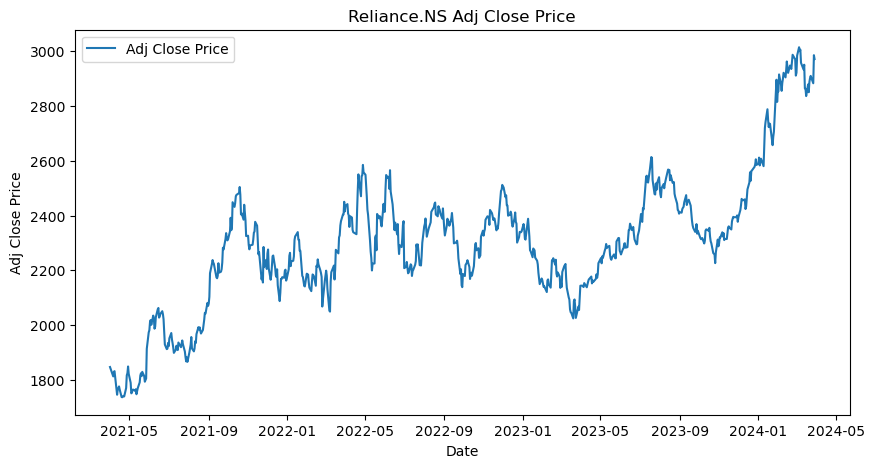

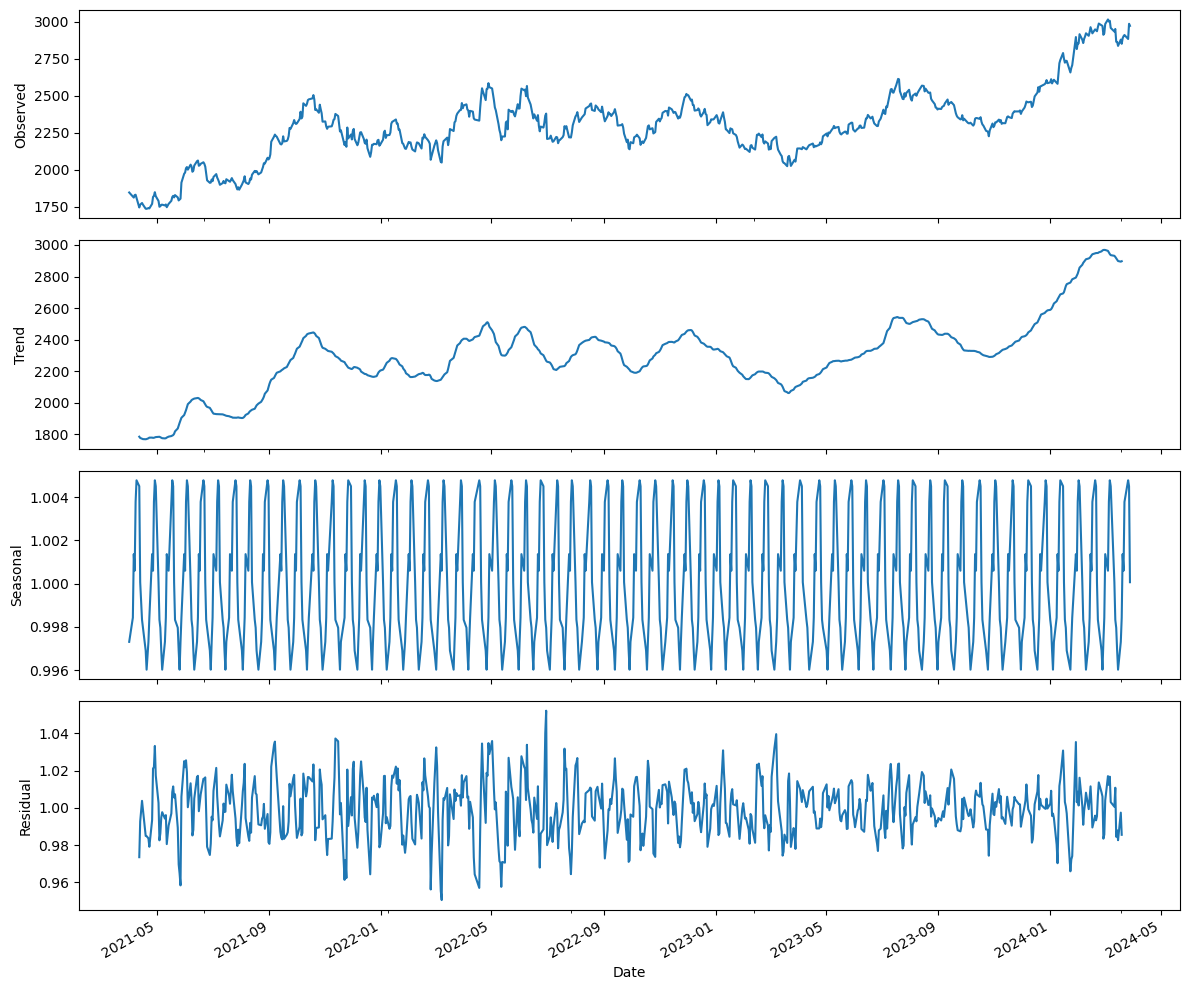

In [5]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df, label='Adj Close Price')
plt.title('Reliance.NS Adj Close Price')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

# Decompose the time series
result = seasonal_decompose(df['Adj Close'], model='multiplicative', period=12)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()



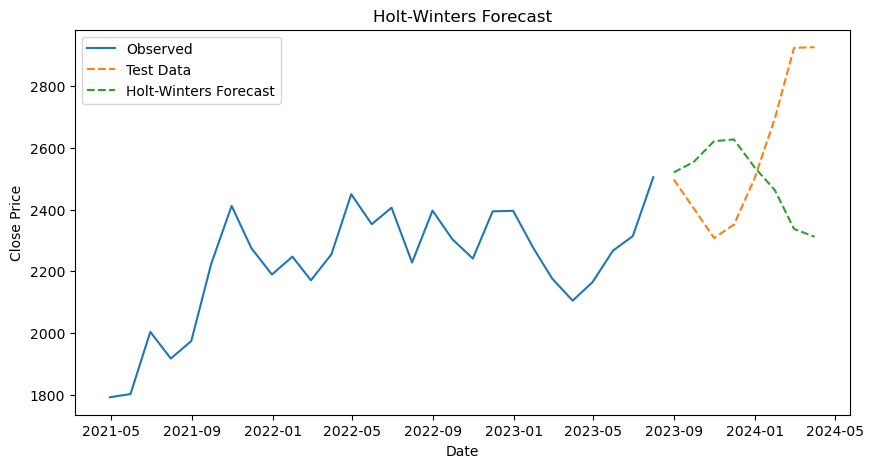

Holt-Winters - RMSE: 349.36251449165064, MAE: 279.48510185024696, MAPE: nan, R-squared: -1.3103203448255023
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   28
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -168.627
Date:                Tue, 23 Jul 2024   AIC                            339.254
Time:                        00:22:54   BIC                            340.550
Sample:                    04-30-2021   HQIC                           339.640
                         - 07-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.556e+04   5956.131      2.612      0.009    3881.205    2.72e+04
Ljung-Box (L1) (Q):    

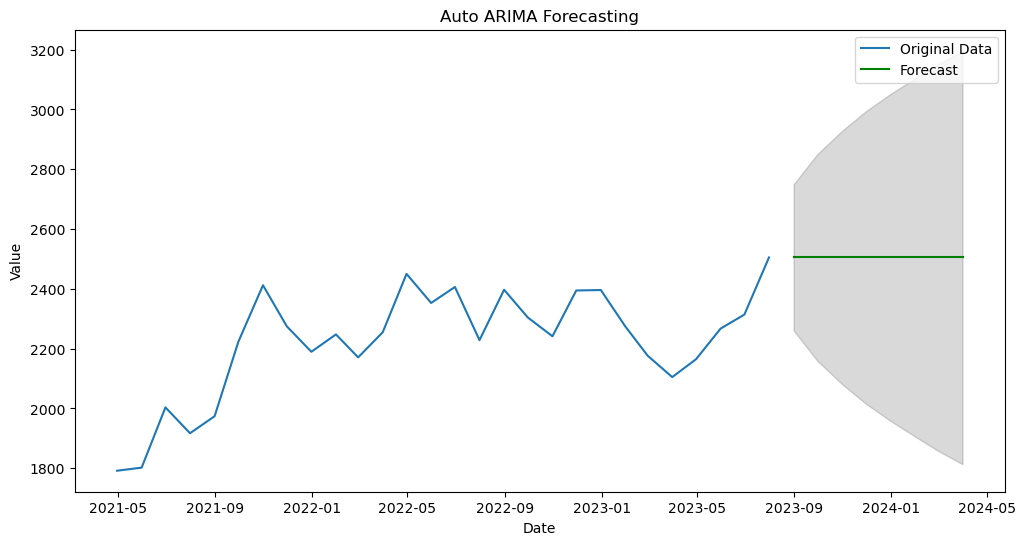

ARIMA - RMSE: 240.58458546275583, MAE: 186.99353078206389, MAPE: nan, R-squared: -0.09560798652791958
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  740
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3643.931
Date:                Tue, 23 Jul 2024   AIC                           7289.863
Time:                        00:22:58   BIC                           7294.468
Sample:                             0   HQIC                          7291.638
                                - 740                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1123.1750     36.982     30.371      0.000    1050.692    1195.658
Ljung-Box (L1) (Q):          

C:\Users\mohit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\mohit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


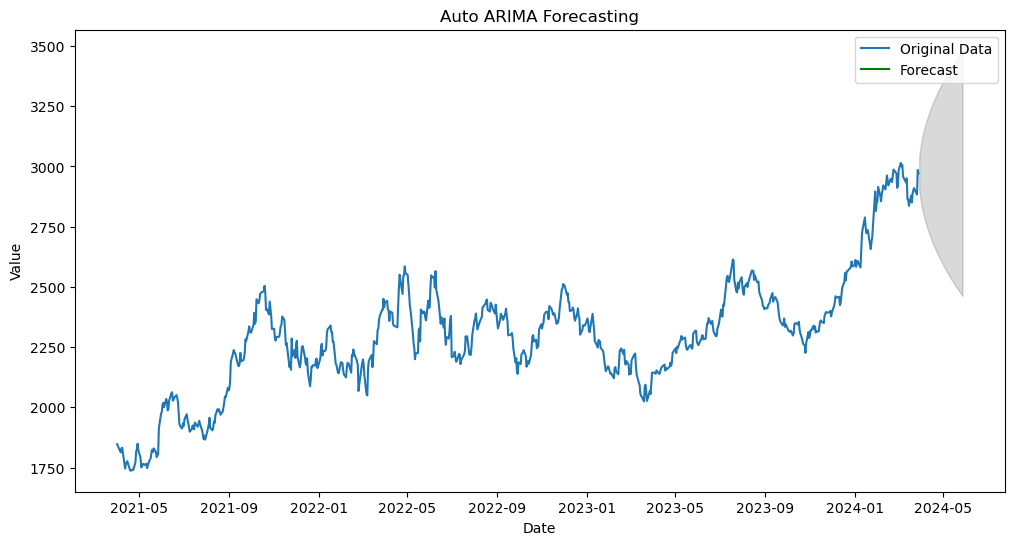

C:\Users\mohit\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 30, 50)         │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0153 - val_loss: 0.0123
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0076 - val_loss: 0.0072
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0061 - val_loss: 0.0064
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0050 - val_loss: 0.0055
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0046 - val_loss: 0.0051
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0040 - val_loss: 0.0027
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0042 - val_loss: 0.0035
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0038 - val_loss: 0.0022
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0034 - val_loss: 0.0028
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0

In [6]:
# Resample to monthly data
monthly_data = df.resample("M").mean()

# Split the data into training and test sets
train_data, test_data = train_test_split(monthly_data, test_size=0.2, shuffle=False)

# Fit the Holt-Winters model
holt_winters_model = ExponentialSmoothing(train_data, seasonal='mul', seasonal_periods=12).fit()

# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(len(test_data))

# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Observed')
plt.plot(test_data.index, test_data, label='Test Data', linestyle='--')
plt.plot(test_data.index, holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Compute RMSE, MAE, MAPE, R-squared for Holt-Winters model
rmse = np.sqrt(mean_squared_error(test_data, holt_winters_forecast))
mae = mean_absolute_error(test_data, holt_winters_forecast)
mape = np.mean(np.abs((test_data - holt_winters_forecast) / test_data)) * 100
r2 = r2_score(test_data, holt_winters_forecast)
print(f'Holt-Winters - RMSE: {rmse}, MAE: {mae}, MAPE: {mape}, R-squared: {r2}')

# Fit auto_arima model
arima_model = auto_arima(train_data['Adj Close'], 
                         seasonal=True, 
                         m=12,  # Monthly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

# Print the model summary
print(arima_model.summary())

# Generate forecast
n_periods = len(test_data)
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data['Adj Close'], label='Original Data')
plt.plot(test_data.index, forecast, label='Forecast', color='green')
plt.fill_between(test_data.index, 
                 conf_int[:, 0], 
                 conf_int[:, 1], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

# Compute RMSE, MAE, MAPE, R-squared for ARIMA model
rmse = np.sqrt(mean_squared_error(test_data, forecast))
mae = mean_absolute_error(test_data, forecast)
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
r2 = r2_score(test_data, forecast)
print(f'ARIMA - RMSE: {rmse}, MAE: {mae}, MAPE: {mape}, R-squared: {r2}')

# Daily data processing
daily_data = df.copy()

# Fit auto_arima model for daily data
arima_model = auto_arima(daily_data['Adj Close'], 
                         seasonal=True, 
                         m=7,  # Weekly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

# Print the model summary
print(arima_model.summary())

# Generate forecast
n_periods = 60  # Forecast the next 60 days
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

# Create future dates index
last_date = daily_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods)

# Convert forecast to a DataFrame with future_dates as the index
forecast_df = pd.DataFrame(forecast, index=future_dates, columns=['forecast'])
conf_int_df = pd.DataFrame(conf_int, index=future_dates, columns=['lower_bound', 'upper_bound'])

# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'], label='Original Data')
plt.plot(forecast_df, label='Forecast', color='green')
plt.fill_between(future_dates, 
                 conf_int_df['lower_bound'], 
                 conf_int_df['upper_bound'], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select features (excluding 'Adj Close') and target ('Adj Close')
features = data.drop(columns=['Adj Close'])
target = data[['Adj Close']]

# Fit the scaler on features and target
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target)

# Create DataFrame with scaled features and target
scaled_df = pd.DataFrame(scaled_features, columns=features.columns, index=df.index)
scaled_df['Adj Close'] = scaled_target

# Function to create sequences
def create_sequences(scaled_df, target_col, sequence_length):
    sequences = []
    labels = []
    for i in range(len(scaled_df) - sequence_length):
        sequences.append(scaled_df.iloc[i:i + sequence_length].values)
        labels.append(scaled_df.iloc[i + sequence_length, target_col])  # Target column index
    return np.array(sequences), np.array(labels)

# Define the target column index and sequence length
target_col = scaled_df.columns.get_loc('Adj Close')
sequence_length = 30

# Create sequences
X, y = create_sequences(scaled_df, target_col, sequence_length)

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to get them back to the original scale
y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), features.shape[1])), y_test.reshape(-1, 1)), axis=1))[:, -1]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), features.shape[1])), y_pred), axis=1))[:, -1]

# Compute RMSE, MAE, MAPE, R-squared for LSTM model
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
mape = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_test_scaled)) * 100
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f'LSTM - RMSE: {rmse}, MAE: {mae}, MAPE: {mape}, R-squared: {r2}')
